In [74]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

[nltk_data] Downloading package wordnet to /home/ggapp/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [54]:
trump_tweets = pd.read_csv('tweets/trump.csv')

print(trump_tweets.shape)
trump_tweets.head(10)

(3591, 7)


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Will be interviewed at the Border by @seanhann...,01-11-2019 01:45:54,11518,67631,False,1083540470570143750
1,Twitter for iPhone,Dear Diary... https://t.co/NAuMaQW6fl,01-11-2019 01:10:49,45849,177910,False,1083531644785455104
2,Twitter for iPhone,From the Southern Border.... https://t.co/Vgsf...,01-10-2019 22:41:01,33539,129711,False,1083493944527249408
3,Twitter for iPhone,RT @SenateGOP: Why do we need border security?...,01-10-2019 18:17:01,25555,0,True,1083427505736839168
4,Twitter for iPhone,Because of the Democrats intransigence on Bord...,01-10-2019 18:14:31,21503,95295,False,1083426878336036865
5,Twitter for iPhone,President Obama thank you for your great suppo...,01-10-2019 16:47:11,55042,173490,False,1083404900862545920
6,Twitter for iPhone,MAKE AMERICA GREAT AGAIN!,01-10-2019 13:43:54,42673,198515,False,1083358775925460992
7,Twitter for iPhone,Getting ready to leave for the Great State of ...,01-10-2019 13:43:15,15164,101829,False,1083358611315789826
8,Twitter for iPhone,“Great support for Border Security and the Wal...,01-10-2019 13:41:25,18519,90118,False,1083358150214979585
9,Twitter for iPhone,There is GREAT unity with the Republicans in t...,01-10-2019 13:34:10,18829,87119,False,1083356326833602561


In [55]:
bolso_tweets = pd.read_csv('tweets/bolsonaro.csv')

print(bolso_tweets.shape)
bolso_tweets.head(10)

(3274, 11)


,screen_name,created_at,text,retweet_count,favorite_count,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
0,jairbolsonaro,2019-11-01T00:30:19Z,"De volta ao Brasil, após viagem de negócios pe...",363,1975,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190063483779465219
1,jairbolsonaro,2019-10-31T21:31:36Z,"O @MInfraestrutura , junto com o @DNIToficial ...",314,1498,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190018506533814307
2,jairbolsonaro,2019-10-31T20:28:18Z,É uma enorme satisfação ver a alegria dessa mo...,93,563,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190002578521767936
3,jairbolsonaro,2019-10-31T19:00:44Z,"A Baia de Angra dos Reis pode ser a nossa ""Can...",313,1637,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189980543380836356
4,jairbolsonaro,2019-10-31T17:10:23Z,"Bahia: concessão da Ferrovia Oeste-Leste, trec...",140,738,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189952770088013824
5,jairbolsonaro,2019-10-31T11:52:19Z,RT @SF_Moro: Prosseguem os recordes de apreens...,6478,0,NaN,SF_Moro,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189872726091141121
6,jairbolsonaro,2019-10-30T22:57:59Z,@Pauloeuaqui Kkkkkk,1,29,Pauloeuaqui,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,NaN,1189677859176095744
7,jairbolsonaro,2019-10-30T22:53:23Z,Risco-Brasil chega a seu menor patamar desde 2...,1074,4714,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189676703204937729
8,jairbolsonaro,2019-10-30T20:12:46Z,E CONHECEREIS A VERDADE E A VERDADE VOS LIBERT...,1255,4409,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189636282227531776
9,jairbolsonaro,2019-10-30T18:13:02Z,"Seguimos ampliando as possibilidades, bem como...",126,727,jairbolsonaro,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189606148267229184


In [101]:
import string, re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

def clean(text, language):
    stop = set(stopwords.words(language))
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    doc = re.sub(r'http\S+', '', text)
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

bolso_tweets_cleaned = []
for tweet in bolso_tweets['text'].values:
    bolso_tweets_cleaned.append(clean(tweet,'portuguese'))
    
trump_tweets_cleaned = []
for tweet in trump_tweets['text'].values:
    trump_tweets_cleaned.append(clean(tweet,'english'))

Top terms per cluster:
Cluster 0:
 great
 state
 democrat
 rt
 united
 court
 president
 trump
 crime
 america
Cluster 1:
 great
 rt
 job
 america
 realdonaldtrump
 make
 deal
 year
 trade
 trump
Cluster 2:
 thank
 you
 law
 great
 election
 love
 president
 rt
 enforcement
 trump
Cluster 3:
 amp
 people
 country
 border
 great
 must
 security
 wall
 democrat
 going


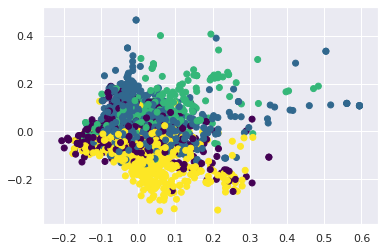

Top terms per cluster:
Cluster 0:
 brasil
 sobre
 abraço
 bolsonaro
 dia
 forte
 governo
 ministro
 presidente
 vamos
Cluster 1:
 hoje
 brasil
 federal
 governo
 recursos
 breve
 deste
 todos
 rt
 dia
Cluster 2:
 rt
 ano
 brasil
 2019
 bolsonaro
 maior
 ser
 milhões
 jairbolsonaro
 governo
Cluster 3:
 todos
 obrigado
 brasil
 boa
 deus
 noite
 abraço
 bom
 consideração
 dia


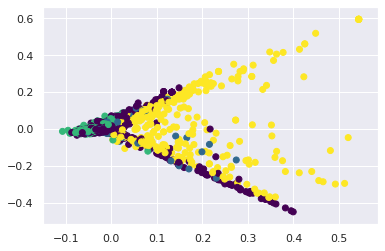

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def kmeans(documents):

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(documents)
    true_k = 4
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1, n_init=2)
    model.fit(X)
    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()    
    for i in range(true_k):
        print ("Cluster %d:" % i)
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind])

    pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ])          

    X = pipeline.fit_transform(documents).todense()        
    pca = PCA(n_components=50).fit(X)
    data2D = pca.transform(X)    
    plt.scatter(data2D[:,0], data2D[:,1],c=model.labels_, cmap='viridis')
    plt.show()
    
kmeans(trump_tweets_cleaned)
kmeans(bolso_tweets_cleaned)

In [119]:
from hatesonar import Sonar
from textblob import TextBlob
import mtranslate

def sentiment_analysis(docs, translate):
    sonar = Sonar()
    sonar_dict = []
    polarity = []
    for documents in docs:
        if(translate):
            documents = mtranslate.translate(documents)
        sonar_dict.append(sonar.ping(text=documents))
        analysis_tb = TextBlob(documents)
        polarity.append(analysis_tb.sentiment.polarity)
        
    return sonar_dict, polarity

bolso_sonar, bolso_polarity = sentiment_analysis(bolso_tweets_cleaned,1)
trump_sonar, trump_polarity = sentiment_analysis(trump_tweets_cleaned,0)

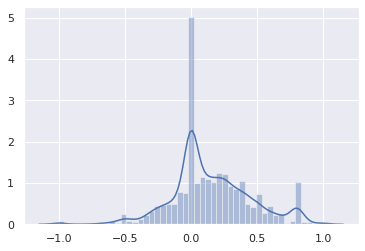

In [120]:
sns.distplot(trump_polarity)

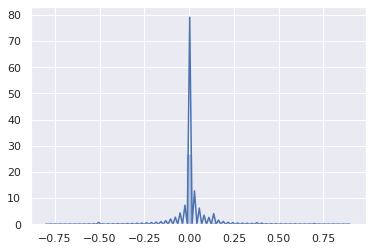

In [121]:
sns.distplot(bolso_polarity)